## Introduction

In this mini project, you will explore and analyze the Google Apps dataset. There is no question so you will have to be self motivated in finding out what you want to know about this data, what looks interesting to you and what results to want to communicate.

We will provide some questions and examples as initial guidance. You can (and should) also discuss with the tutors and other class mates on ideas, things you want to achieve and Python techniques during class.

Son Huynh
31.01.2020

Deadline: **10am 06.03** (Friday)

Submit link: https://www.dropbox.com/request/ZvBWoQUCy8pwRVxQxwJx

In [194]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#extra lib for treemaps
import squarify

In [5]:
apps = pd.read_csv('googleplaystore.csv')

In [6]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [285]:
import re
apps = pd.read_csv('googleplaystore.csv')
apps.columns = apps.columns.str.replace(' ', '')
# change price to a float data type
apps.Price = apps.Price.str.replace('$', '')
apps.Price = apps.Price.astype(float)
# change installs to an integer data type
apps.Installs = apps.Installs.str.replace(r'[,+]', '')
apps.Installs = apps.Installs.astype(int)

# change size to number value in MB
repl = lambda x: (x.group(0)[1:-1])
apps.Size = apps.Size.str.replace('Varies with device', '0')
apps.Size = apps.Size.str.replace('M','000')
apps.Size = apps.Size.str.replace(r'(\.[0-9]000)', repl)
apps.Size = apps.Size.str.replace(r'[k]', '')
apps.Size = apps.Size.str.replace(r'\.[0-9]','')
apps.Size = apps.Size.astype(int)/1000

# add android major version x.y
apps['AndroidVerMajor'] = apps.AndroidVer.str[:3]
apps.AndroidVerMajor = apps.AndroidVerMajor.str.replace('Var', '0')
apps.AndroidVerMajor = apps.AndroidVerMajor.astype(float)

# clean up type
# apps['Type'] = apps[apps.Type.isna()]


# drop duplicated rows
apps.drop_duplicates(inplace = True, keep='first', subset = 'App')


In [286]:
# apps.AndroidVerMajor.unique()
# apps.AndroidVerMajor.unique()
# apps.Size.unique()
apps.head()

apps[apps.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,AndroidVerMajor
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,0.0,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,0.0


### One of the greatest qualities of a data analyst is the ability to ask questions yourself. Be curious about your data.

Below is a suggested workflow and some questions to motivate you. Try to think of other questions as well.

1- Data cleaning:
    - Use string slicing and string methods to change columns like 'Size', 'Installs', 'Price', ... to numbers
    - Remove duplicate rows


2- Inspect the data, calculate some statistics and write some comments on interesting observations.
    - Which are the top 10-20 most installed (reviewed) apps? Do you see any weird app?
    - Which are the top 10-20 most expensive apps?
    - Which popular apps (100,000+ installs) are disliked the most?

3- Visualize and comment on some or all columns. For example:
    - Pick a few interesting columns and make a pairplot. Do you see any interesting scatterplot?
    - Which categories have the most apps? Which categories are most popular (by installs)?
    - What is the range of application size (maybe using a boxplot?)
    - Visualize the distribution of price for paid apps only
    - Plot the Content Rating column


4- More possibly interesting questions to explore:
    - Shows the relationship between price, rating and category (pick only 5 categories)
    - Do free apps have more installs than paid apps on average?
    - Which categories appear the most among top 100 most expensive apps?
    - Can you show the top 100 most common words that appear in apps name?

5- Ultimately, even without predictive analytic, your report should have at least 1 actionable recommendation. You could:
    - Pick a category/genre and answer this question: If I want to develop an app in this domain, what should I remember?
    - Or a more general question: I want to be a mobile dev, what is a good advice for me?

### Remember to comment something after you produce a statistic table or chart to summarize the results or discuss things that you found interesting.

Communication is also an important skill in data analysis. Without meaningful summary and comments, people won't understand your beautiful chart.

<p style="color:green;">Example</p>

Group the data by category and explore the average rating

In [287]:
gb = apps.groupby('Category')

cat_mean = gb.mean()

cat_mean

,Rating,Reviews,Size,Installs,Price,AndroidVerMajor
Category,,,,,,
ART_AND_DESIGN,4.357377,22175.046875,11.984375,1.786533e+06,0.093281,3.746875
AUTO_AND_VEHICLES,4.190411,13690.188235,17.679835,6.250613e+05,0.158471,3.768235
BEAUTY,4.278571,7476.226415,12.233962,5.131519e+05,0.000000,3.709434
BOOKS_AND_REFERENCE,4.344970,75321.234234,11.478072,7.504367e+06,0.539505,3.055856
BUSINESS,4.098479,23548.202381,12.414440,1.659916e+06,0.417357,3.626190
COMICS,4.181481,41822.696429,12.070589,8.032348e+05,0.000000,3.421429
COMMUNICATION,4.121484,907337.676190,8.686978,3.504215e+07,0.263937,2.929206
DATING,3.970149,21190.315789,14.562094,8.241293e+05,0.160468,3.957310
EDUCATION,4.364407,112303.764706,14.252790,2.965983e+06,0.150924,2.974790


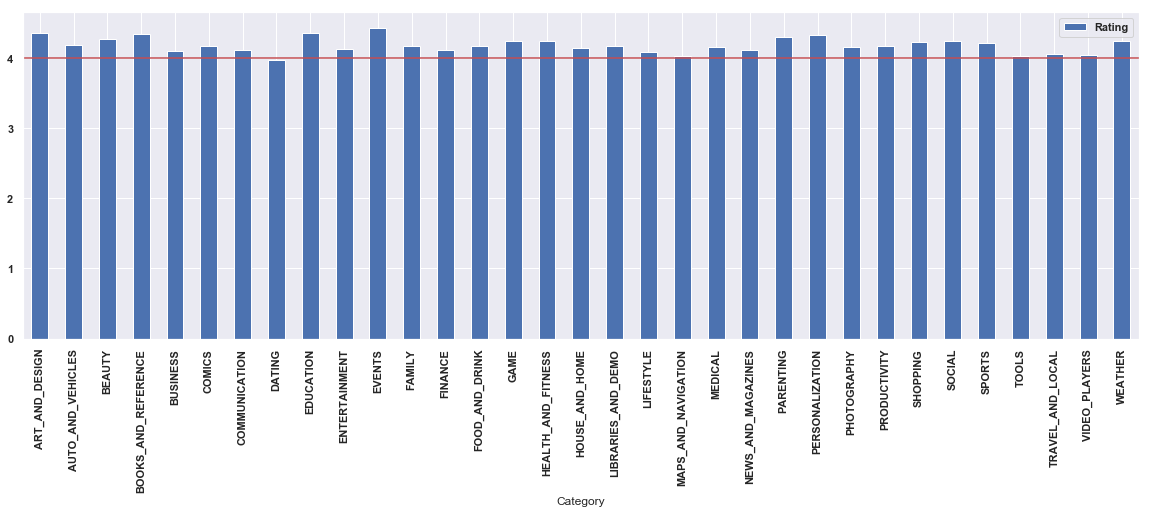

In [288]:
rating = cat_mean.plot(kind='bar', y='Rating', figsize=(20,6))

#rating.set_ylim(3, 4.5)

rating.axhline(y=4, color='r')

We can see that Events apps are usually rated very high in the market. Other highly rated categories are Art, Books and Education.

All categories except Dating apps have an average rating above 4. It could either be that people are often frustrated with dating apps, or that these apps tend to have poor design and functionality.

### Additionally, you can look for well made notebooks on kaggle.com. Here is one good example on the Titanic dataset that you can draw inspiration from:

https://www.kaggle.com/ash316/eda-to-prediction-dietanic



### Now it's your turn to explore the data

There isn't too much correlation between the different metrics. Except for...

**Reviews to Installs.**

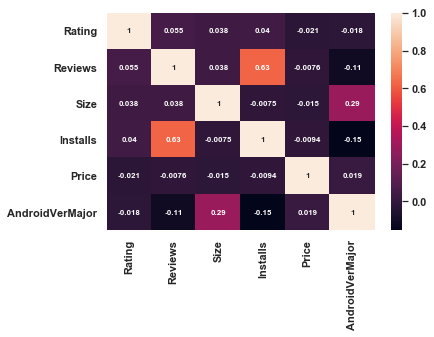

In [289]:
sns.heatmap(apps.corr(), annot=True)

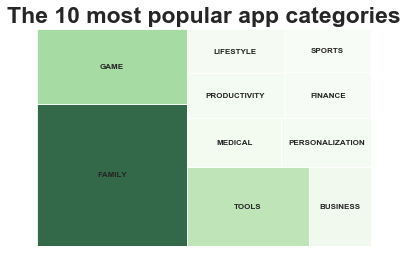

In [290]:
# Select the n most common categories and aggregate the rest of the categories in a single value
n = 10
categories = apps.Category.value_counts().head(n)

# Tree map
cmap = plt.cm.Greens
mini=min(categories)
maxi=max(categories)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in categories]


plt.title(f"The {n} most popular app categories",fontsize=23,fontweight="bold")
plt.rcParams.update({'font.size':'8', 'font.weight':'bold'})
ax = squarify.plot(sizes = categories.tolist(), label = categories.index, alpha = 0.8, color= colors)
plt.axis('off')


plt.show()

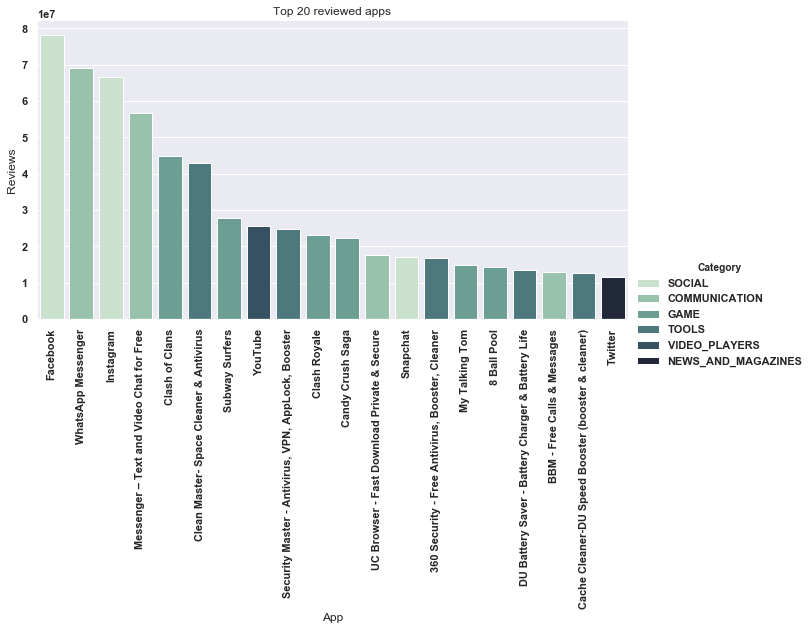

In [291]:
n = 20 # top n installed apps
t = 1000000 # number of installs
d = apps[(apps.Installs >= t)].sort_values(['Reviews', 'Installs'], ascending = False).head(n)
rng = len(d.Category.unique())

color = sns.cubehelix_palette(rng, start=0.0, rot=-.4)
g = sns.catplot(x="App", y="Reviews", hue='Category', data=d, kind="bar", aspect = 1.8, palette=color, dodge=False).set(title = f'Top {n} reviewed apps')
g.set_xticklabels(rotation = 90)


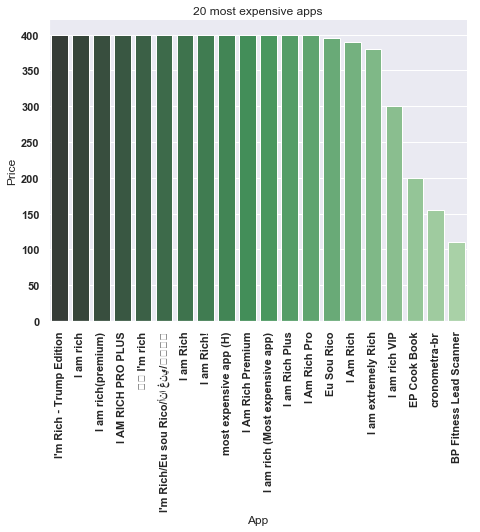

In [292]:
n = 20 # n most expensive apps.

d = apps.sort_values('Price', ascending = False).head(20)

g = sns.catplot(kind='bar', x='App', y='Price', data = d, aspect = 1.5, palette = 'Greens_d').set(title = f'{n} most expensive apps')
g.set_xticklabels(rotation = 90)



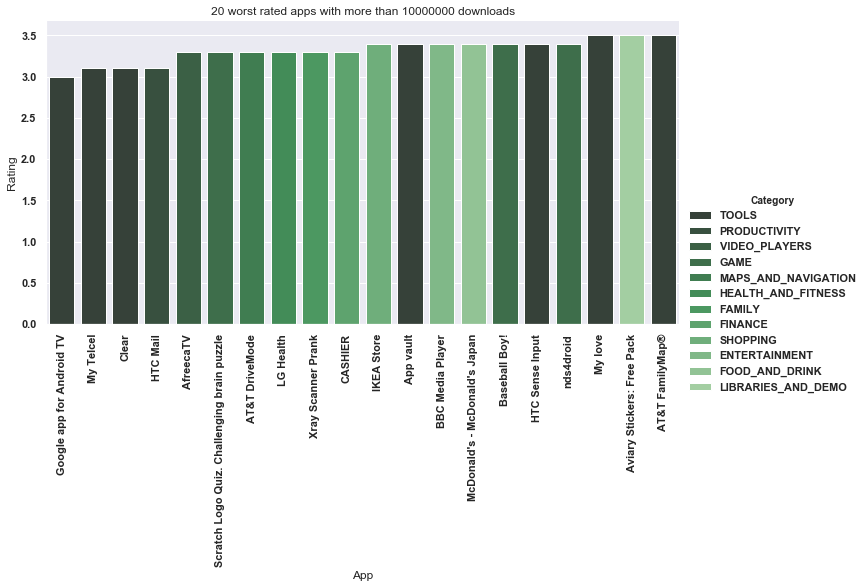

In [293]:
n = 20 # top 20
t = 10000000 # more than 10 million downloads

d = apps[(apps.Installs >= t)].sort_values('Rating', ascending = True)


g = sns.catplot(kind = 'bar', x='App', y='Rating', hue='Category', data=d.head(n), aspect = 2, dodge=False, palette="Greens_d").set(title=f'{n} worst rated apps with more than {t} downloads')
g.set_xticklabels(rotation = 90)



In [294]:
# success per category

